## Getting ready

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

2022-01-19 13:35:15.011700: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


## How to do it

In [2]:
batch_size = 20

In [5]:
iris = tfds.load('iris', split='train[:90%]', as_supervised=True)
iris_test = tfds.load('iris', split='train[90%:]', as_supervised=True)

def iris2d(features, label):
    return features[2:], tf.cast((label == 0), dtype=tf.float32)

train_generator = (iris.map(iris2d).shuffle(buffer_size=100).batch(batch_size))

test_generator = iris_test.map(iris2d).batch(1)

In [6]:
def linear_model(X, A, b):
    my_output = tf.add(tf.matmul(X, A), b)
    return tf.squeeze(my_output)

In [7]:
def xentropy(y_true, y_pred):
    return tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,
                                            logits=y_pred))

In [8]:
my_opt = tf.optimizers.SGD(learning_rate=0.02)

In [12]:
tf.random.set_seed(1)

np.random.seed(0)
A = tf.Variable(tf.random.normal(shape=[2, 1]))
b = tf.Variable(tf.random.normal(shape=[1]))
history = list()

for i in range (300):
    iteration_loss = list()
    for features, label in train_generator:
        with tf.GradientTape() as tape:
            predictions = linear_model(features, A, b)
            loss = xentropy(label, predictions)
        iteration_loss.append(loss.numpy())
        gradients = tape.gradient(loss, [A, b])
        my_opt.apply_gradients(zip(gradients, [A, b]))
    history.append(np.mean(iteration_loss))
    if (i + 1) % 30 == 0:
        print(f'Step # {i + 1} Weights: {A.numpy().T} Biases: {b.numpy()}')
        print(f'Loss = {loss.numpy()}')

Step # 30 Weights: [[-1.1209443  1.2983932]] Biases: [1.0132906]
Loss = 0.26532742381095886
Step # 60 Weights: [[-1.1826787  1.078597 ]] Biases: [1.5136807]
Loss = 0.15758231282234192
Step # 90 Weights: [[-1.2437662  0.8921208]] Biases: [1.9345899]
Loss = 0.309261679649353
Step # 120 Weights: [[-1.303399  0.733038]] Biases: [2.2899842]
Loss = 0.1283969134092331
Step # 150 Weights: [[-1.3524446   0.59706086]] Biases: [2.5992858]
Loss = 0.2309454381465912
Step # 180 Weights: [[-1.3996366   0.47767937]] Biases: [2.8690994]
Loss = 0.17070916295051575
Step # 210 Weights: [[-1.4459962  0.3712319]] Biases: [3.1067233]
Loss = 0.1696748435497284
Step # 240 Weights: [[-1.4860559   0.27646494]] Biases: [3.3210714]
Loss = 0.13427121937274933
Step # 270 Weights: [[-1.5245566   0.19042724]] Biases: [3.514979]
Loss = 0.08230018615722656
Step # 300 Weights: [[-1.5594628   0.11215301]] Biases: [3.6921487]
Loss = 0.11972744017839432


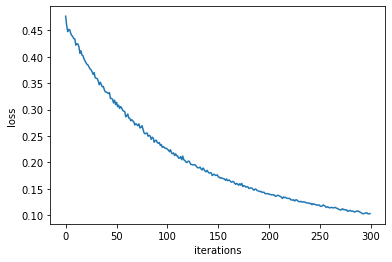

In [13]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [15]:
predictions = list()
labels = list()
for features, label in test_generator:
    predictions.append(linear_model(features, A, b).numpy())
    labels.append(label.numpy()[0])
    
test_loss = xentropy(np.array(labels), np.array(predictions)).numpy()
print(f'test cross-entropy is {test_loss}')

test cross-entropy is 0.1024182140827179


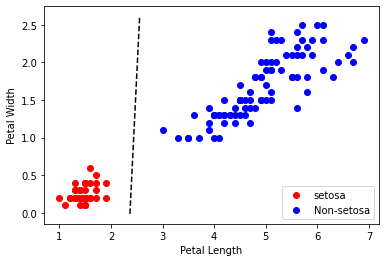

In [17]:
coefficients = np.ravel(A.numpy())
intercept = b.numpy()

# Plotting batches of examples
for j, (features, label) in enumerate(train_generator):
    setosa_mask = label.numpy() == 1
    setosa = features.numpy()[setosa_mask]
    non_setosa = features.numpy()[~setosa_mask]
    plt.scatter(setosa[:,0], setosa[:,1], c='red', label='setosa')
    plt.scatter(non_setosa[:,0], non_setosa[:,1], c='blue', label='Non-setosa')
    if j == 0:
        plt.legend(loc='lower right')
        
# Computing and plotting the decision function
a = -coefficients[0] / coefficients[1]
xx = np.linspace(plt.xlim()[0], plt.xlim()[1], num=10_000)
yy = a * xx - intercept / coefficients[1]
on_the_plot = (yy > plt.ylim()[0]) & (yy < plt.ylim()[1])
plt.plot(xx[on_the_plot], yy[on_the_plot], 'k--')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()